# ARIM-Academy：　基礎編　Scikit-learn（探索的データ分析：Exploratory Data Analysis）

## 本編の目標
この演習では、『**大気腐食データセット**』を活用し、探索的データ分析（Exploratory Data Analysis, EDA）の基礎を習得することを目的としています。

### EDAの目的
EDAの主な目的は以下の通りです。

* **データの理解:** データセットの構造や変数の意味、データの分布を把握します。
* **データの可視化:** グラフや図を用いて、データの分布、パターン、異常値を視覚的に表現します。
* **変数間の関係性の探索:** 相関分析やクロス集計などにより、変数間の関係性を明らかにします。
* **データ前処理への示唆:** 欠損値の処理や外れ値の検出、特徴量エンジニアリングに役立つ示唆を得ます。

### EDAの重要性
EDAはデータ分析とそれに続く機械学習モデルの検討において不可欠なステップです。EDAを通じて得られた知見は、以下の点で重要な役割を果たします。

* **適切なモデル選択:** データの特性に基づき、最適な機械学習モデルを選択できます。
* **特徴量エンジニアリング:** 新たな特徴量の作成や既存特徴量の加工により、モデルの性能を向上させます。
* **データ品質の向上:** 欠損値や外れ値を検出し、適切に処理することで、モデルの精度を向上させます。

### 本編における内容
* **データの理解と準備:** データセットの構造や分布を把握し、欠損値や異常値を検出する前処理手法を学びます。これにより、データを効果的に扱う基礎を築きます。
* **特徴量の探索と相関分析:** 気象因子を特徴量とするこのデータセットを通じ、各特徴量の分布や相関関係を詳細に探索し、データのパターンや傾向を理解する力を養います。
* **データの可視化:** データを視覚的に表現することで、EDAの重要な要素である可視化手法を習得します。これにより、データの特性を直感的に理解し、洞察を得るスキルを磨きます。
* **データの解釈と洞察の獲得:** 特徴量間の関係性やデータパターンを分析し、そこから得られる洞察を解釈する力を養成します。これにより、データから価値ある情報を引き出す力を培います。
---

## データセット
**大気腐食データセット**は、日本の6地点における月次の標準試験片の腐食量データと、気温、風速、降水量、湿度など、さまざまな気象データを組み合わせたものです。このデータセットは、松波らによる『海塩輸送シミュレーションと気象情報を用いた機械学習に基づく大気腐食量評価モデル開発と高精細腐食環境地図の作成』[1] に基づいていますが、本講義用にアレンジされたもので、論文で使用されたデータセットとは異なります。

[1] 松波 成行, 柳生 進二郎, 篠原 正, 片山 英樹, 須藤 仁, 服部 康男, 平口 博丸　"海塩輸送シミュレーションと気象情報を用いた機械学習に基づく大気腐食量評価モデル開発と高精細腐食環境地図の作成", 土木学会論文集A1（構造・地震工学） Vol.75, p141-160(2019) https://www.jstage.jst.go.jp/article/jscejseee/75/2/75_141/_article/-char/ja/

### 腐食観測量
1. **Corrosion**: 腐食速度 （g/m2/y）

### 気象変数
気象データは気象庁の観測値を基にしており、以下の16変数が含まれます。これらの変数は、説明変数として使用します。

1. **AT** : 平均気温（℃）  
2. **HAT** : 日最高気温の平均（℃）  
3. **LAT** : 日最低気温の平均（℃）  
4. **HT** : 最高気温（℃）  
5. **LT** : 最低気温（℃）  
6. **Rain** : 降水量の合計（mm）  
7. **MRain** : 日降水量の最大（mm）  
8. **Sun** : 日照時間（時間）  
9. **MSnow** : 最深積雪（cm）  
10. **Snow** : 降雪量合計（cm）  
11. **AW** : 平均風速（m/s）  
12. **MW** : 最大風速（m/s）  
13. **PMW** : 最大瞬間風速（m/s）  
14. **Vap** : 平均蒸気圧（hPa）  
15. **Hum** : 平均湿度（％）  
16. **LHum** : 最小相対湿度（％）

---

### 教材への接続
google colabにおけるオンラインの場合にこのラインを実行します。（<font color="red">Google colabに接続しない場合には不要</font>）

In [ ]:
!git clone https://github.com/ARIM-Academy/Advanced_Tutorial_1.git
%cd Advanced_Tutorial_1

# 1.データセットの読み込みと前処理

### ライブラリのインポート
この演習で使用するPythonライブラリをimportします。なお、機械学習に関連するscikit-learnライブラリは、後半で別途importします。

In [1]:
#ライブラリ
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



### サンプルファイルの読み込み

`pandas`ライブラリの`read_csv()`関数は、CSVファイルを読み込んで`pandas`の`DataFrame`形式に変換するための関数です。このセクションでは、[data]フォルダ内に保存されている`corrosion_data.csv`ファイルを`DataFrame`として読み込み、その結果を`df`という変数にうになっています。。

In [2]:
#データセットの読み込み
df = pd.read_csv('data/corrosin_data.csv', index_col=0)

In [3]:
#データセットの確認
df

,Month,AT,HAT,LAT,HT,LT,Rain,Mrain,Sun,Msnow,Snow,AW,MW,PMW,Vap,Hum,Lhum,Corrosion
Place,,,,,,,,,,,,,,,,,,
Naha,1,28.3,26.0,31.1,33.6,23.4,178.0,79.0,206.5,0,0,6.0,14.5,20.9,28.5,74,43,674
Naha,2,25.3,23.5,27.7,30.8,19.9,200.0,118.0,129.7,0,0,7.3,22.0,33.6,23.4,72,40,2606
Naha,3,21.3,19.1,23.8,28.5,13.9,121.0,79.0,120.0,0,0,5.0,12.7,20.6,17.4,66,34,546
Naha,4,17.3,15.0,19.6,23.6,10.3,130.0,52.0,89.4,0,0,5.4,14.5,21.5,12.7,64,37,704
Naha,5,16.8,14.1,19.8,23.5,10.6,66.0,36.5,145.4,0,0,5.0,13.1,20.2,11.8,61,32,620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Choshi,8,14.3,10.8,17.6,21.3,3.5,70.5,13.5,232.2,0,0,5.4,15.6,19.2,11.0,67,22,567
Choshi,9,18.2,15.2,21.6,26.1,12.2,151.0,56.5,257.0,0,0,5.7,21.1,26.8,16.6,78,30,541
Choshi,10,21.1,18.9,24.0,27.3,17.1,177.5,56.0,172.3,0,0,4.5,14.3,19.4,22.3,89,46,830


### 不必要な特徴量の削除
pandasライブラリではデータフレームから特定の行や列を削除する操作で`drop()`メソッドを使います。ここではデータフレームdfから観測月のインデックスである'Month'という名前の列を削除します。

In [4]:
#　記述子（特徴量）の削除
df = df.drop(['Month'],axis = 1)
df

,AT,HAT,LAT,HT,LT,Rain,Mrain,Sun,Msnow,Snow,AW,MW,PMW,Vap,Hum,Lhum,Corrosion
Place,,,,,,,,,,,,,,,,,
Naha,28.3,26.0,31.1,33.6,23.4,178.0,79.0,206.5,0,0,6.0,14.5,20.9,28.5,74,43,674
Naha,25.3,23.5,27.7,30.8,19.9,200.0,118.0,129.7,0,0,7.3,22.0,33.6,23.4,72,40,2606
Naha,21.3,19.1,23.8,28.5,13.9,121.0,79.0,120.0,0,0,5.0,12.7,20.6,17.4,66,34,546
Naha,17.3,15.0,19.6,23.6,10.3,130.0,52.0,89.4,0,0,5.4,14.5,21.5,12.7,64,37,704
Naha,16.8,14.1,19.8,23.5,10.6,66.0,36.5,145.4,0,0,5.0,13.1,20.2,11.8,61,32,620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Choshi,14.3,10.8,17.6,21.3,3.5,70.5,13.5,232.2,0,0,5.4,15.6,19.2,11.0,67,22,567
Choshi,18.2,15.2,21.6,26.1,12.2,151.0,56.5,257.0,0,0,5.7,21.1,26.8,16.6,78,30,541
Choshi,21.1,18.9,24.0,27.3,17.1,177.5,56.0,172.3,0,0,4.5,14.3,19.4,22.3,89,46,830


# 2. データの探索的分析 (EDA)

EDAの手法は多岐にわたりますが、代表的な手法として以下が挙げられます。

#### 2.1 概要統計量の算出
* **目的:** データの全体的な傾向を把握します。
* **手法:** 平均値、中央値、標準偏差、最小値、最大値などを計算します。
* **ツール:** pandasの`describe()`関数など

#### 2.2 ペアプロットと相関係数の計算
* **目的:** 数値型変数間の関係性を可視化し、相関関係を定量的に評価します。
* **手法:** 散布図行列を作成し、各変数間の相関係数を計算します。
* **ツール:** seabornの`pairplot()`関数、pandasの`corr()`関数など

#### 2.3 データの可視化
* **目的:** データの分布、パターン、異常値などを視覚的に捉えます。
* **手法:** ヒストグラム、箱ひげ図、散布図、バイオリンプロットなど
* **ツール:** matplotlib、seabornなど


3つのぞれぞれのデータ分析についてみてみましょう

### ①概要統計
概要統計（Descriptive Statistics）は、データセットの要約統計量を計算することで、データの特徴や分布を理解する手法です。出力される指標は、平均、中央値、最小値、最大値、標準偏差、四分位数です。

pandasライブラリに含まれている`describe()`メソッドを使うとデータセットの概要統計を簡単に取得することができます。具体的には、`describe()`関数は以下の統計情報を計算します。

1. **カウント（Count）:** データの非欠損値の数を示します。
2. **平均（Mean）:** データの平均値を示します。
3. **標準偏差（Standard Deviation）:** データのばらつきの尺度を示します。
4. **最小値（Minimum）:** データの最小値を示します。
5. **第一四分位数（25th Percentile）:** データの下位25%の値を示します。
6. **中央値（Median）:** データの中央値（50thパーセンタイル）を示します。
7. **第三四分位数（75th Percentile）:** データの上位25%の値を示します。
8. **最大値（Maximum）:** データの最大値を示します。

In [5]:
#概要統計
df.describe()

,AT,HAT,LAT,HT,LT,Rain,Mrain,Sun,Msnow,Snow,AW,MW,PMW,Vap,Hum,Lhum,Corrosion
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,18.357746,15.057746,22.080282,27.078873,10.543662,168.260563,56.866197,168.360563,0.394366,0.605634,3.901408,13.028169,21.056338,17.240845,71.873239,31.000000,731.183099
std,7.366113,8.254188,6.804003,6.015193,8.945306,113.671986,37.373115,48.951817,3.091365,4.755385,1.622563,5.507636,7.019010,8.491922,8.988770,14.081396,572.607852
min,2.800000,-3.600000,9.100000,14.900000,-7.700000,16.000000,7.000000,61.700000,0.000000,0.000000,1.800000,6.500000,12.400000,4.300000,53.000000,9.000000,57.000000
25%,12.950000,8.000000,17.250000,22.900000,2.400000,94.750000,29.000000,129.100000,0.000000,0.000000,2.400000,9.350000,17.300000,9.450000,64.000000,18.500000,404.500000
50%,19.300000,16.800000,23.600000,27.300000,12.100000,134.500000,47.000000,174.000000,0.000000,0.000000,3.400000,11.400000,19.300000,17.000000,72.000000,30.000000,562.000000
75%,24.550000,21.600000,27.600000,31.950000,17.550000,196.500000,76.500000,201.850000,0.000000,0.000000,5.200000,14.500000,21.500000,23.850000,79.000000,40.500000,914.000000
max,29.400000,27.300000,32.300000,37.000000,25.600000,494.000000,212.000000,280.700000,26.000000,40.000000,7.300000,33.500000,50.200000,33.400000,90.000000,63.000000,2799.000000


### ②　ペアプロット（散布図行列）
ペアプロット（Pair plot）は、データセット内の複数の数値変数の組み合わせに基づいた散布図行列を可視化する手法で、変数間の相関やパターンを把握することができます。

ペアプロットを作成するライブラリは幾つかありますが、Seabornライブラリの`pairplot()`メソッドは比較的に簡単にデータセット内の数値変数の組み合わせに基づいて散布図行列を作成し、各変数間の散布図やヒストグラムを表示します。

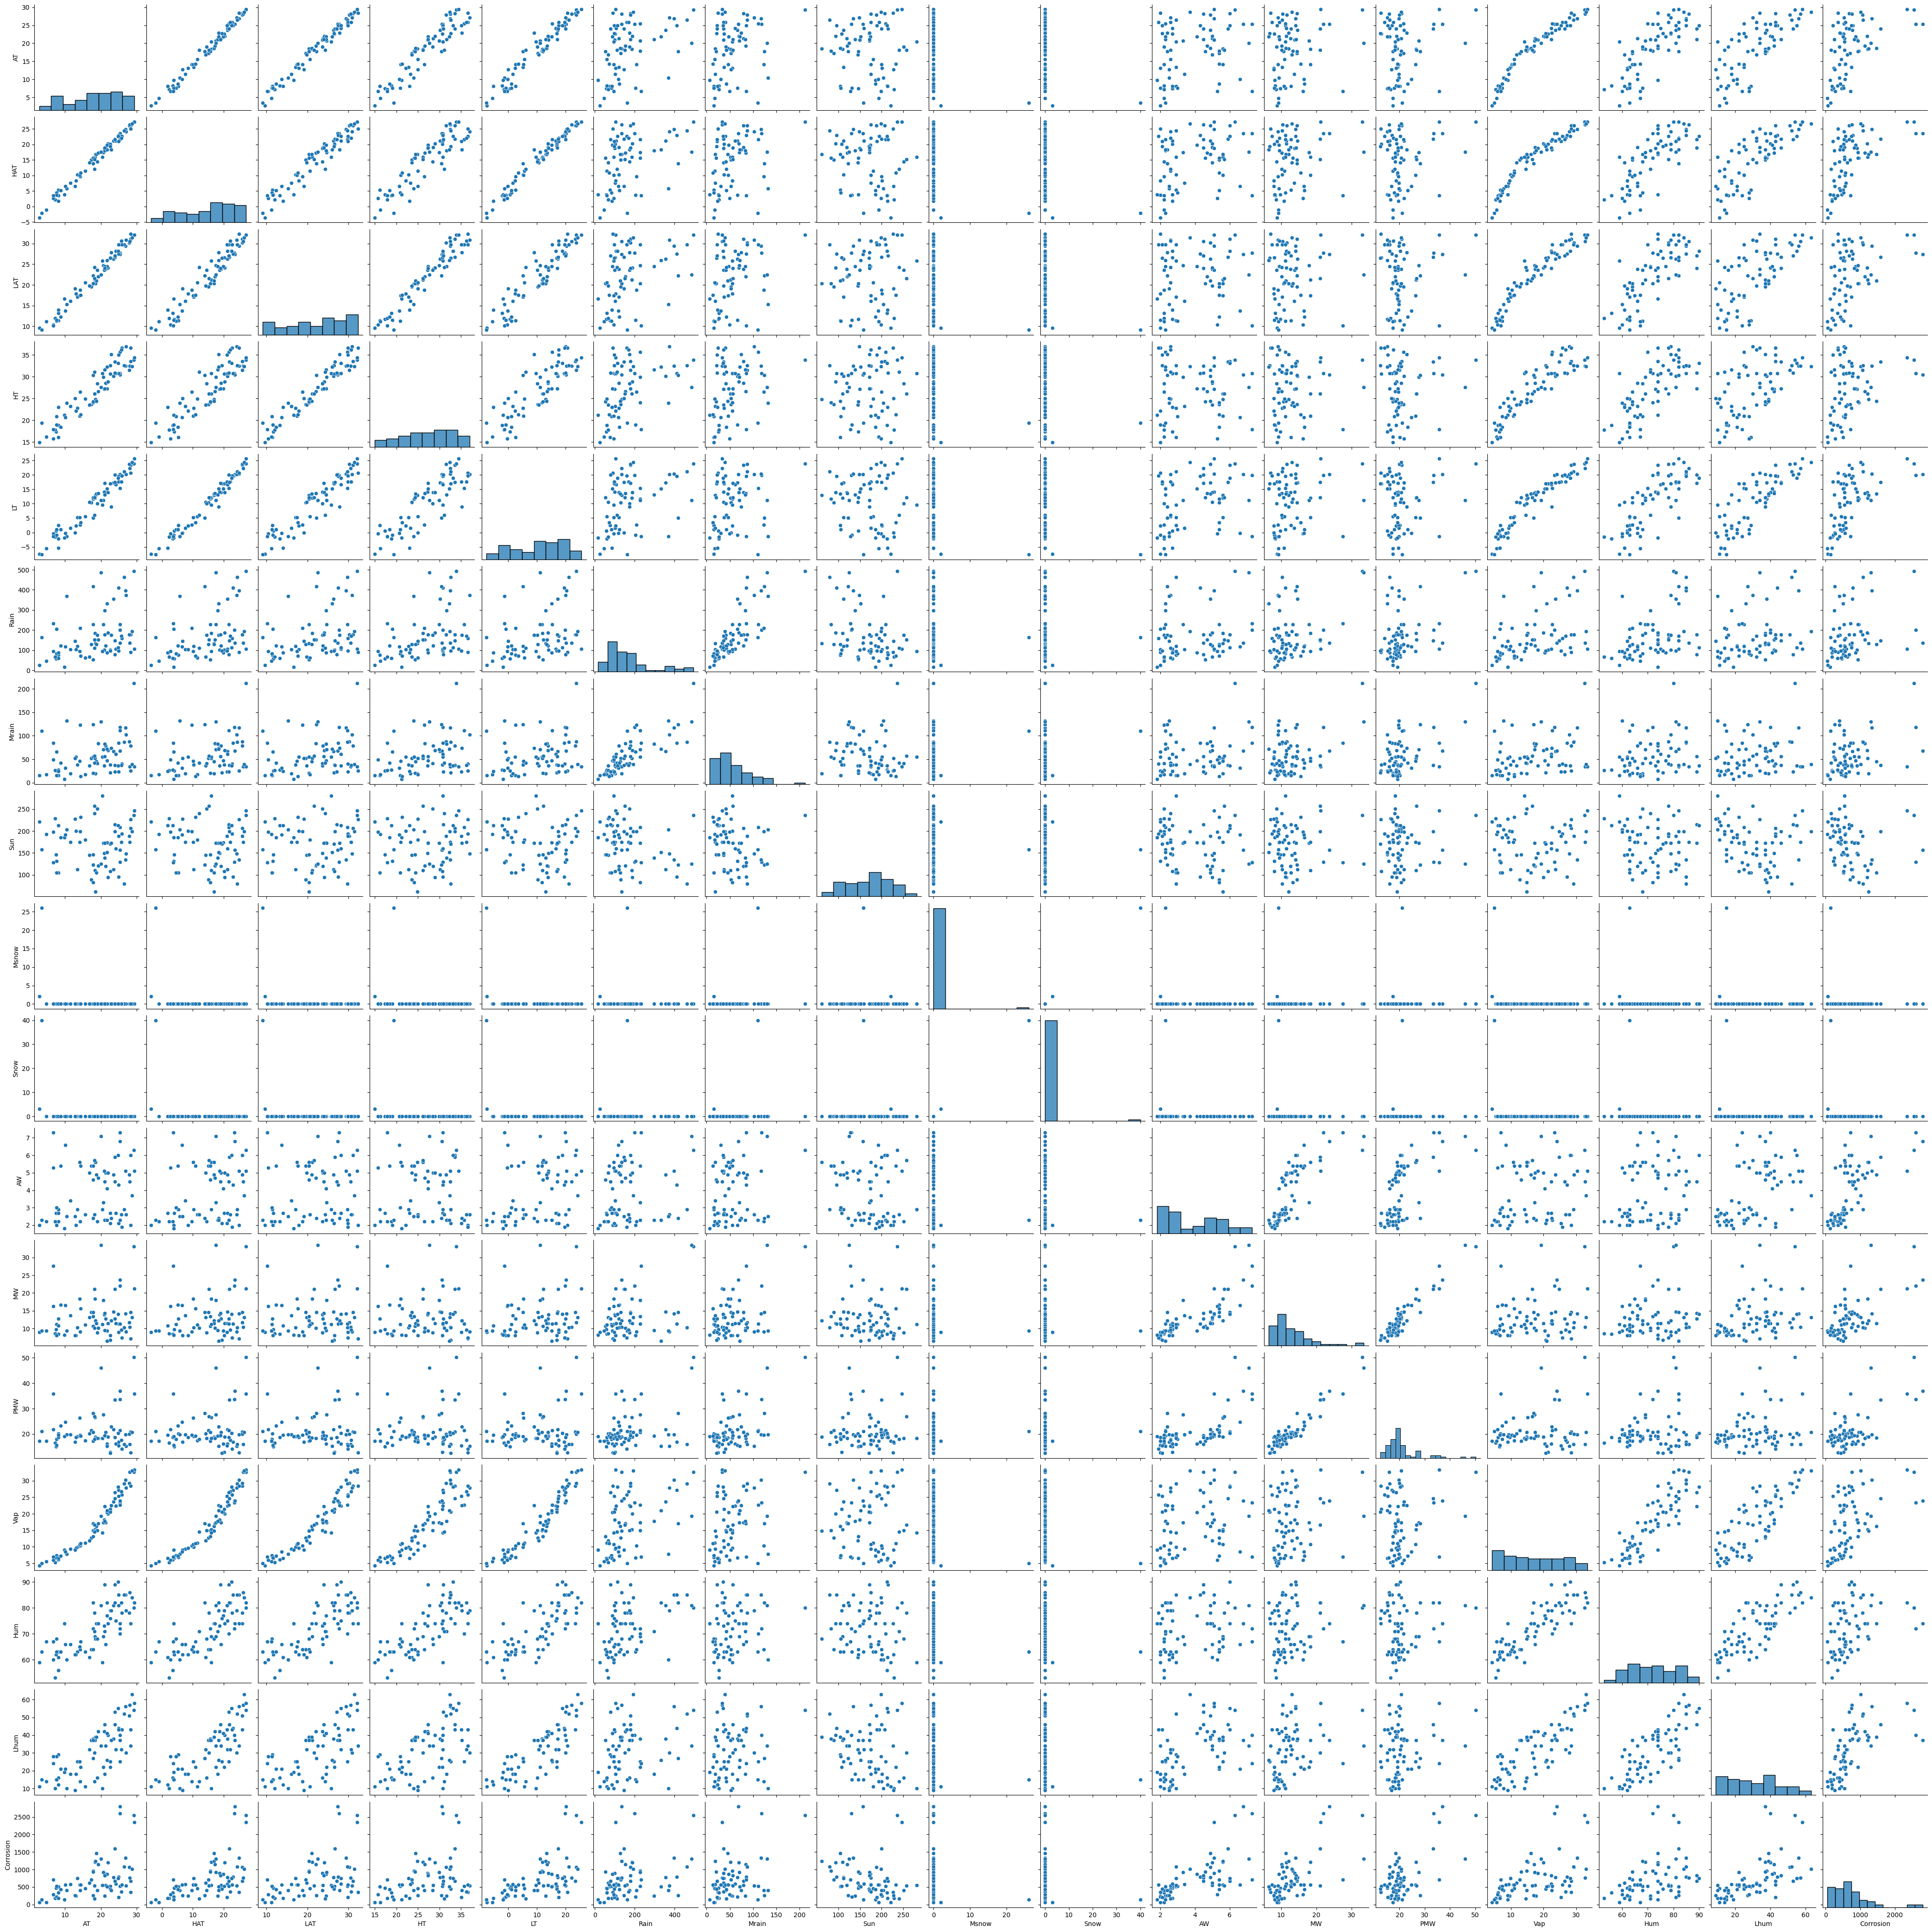

In [6]:
#　ペアプロットによる各変数間の二次元空間像
sns.pairplot(df)
plt.show()

表示させる変数名を絞り込んでみましょう。`pairplot()`のメソッドでは次のようにデータフレームの変数名を指定することで対応できます。

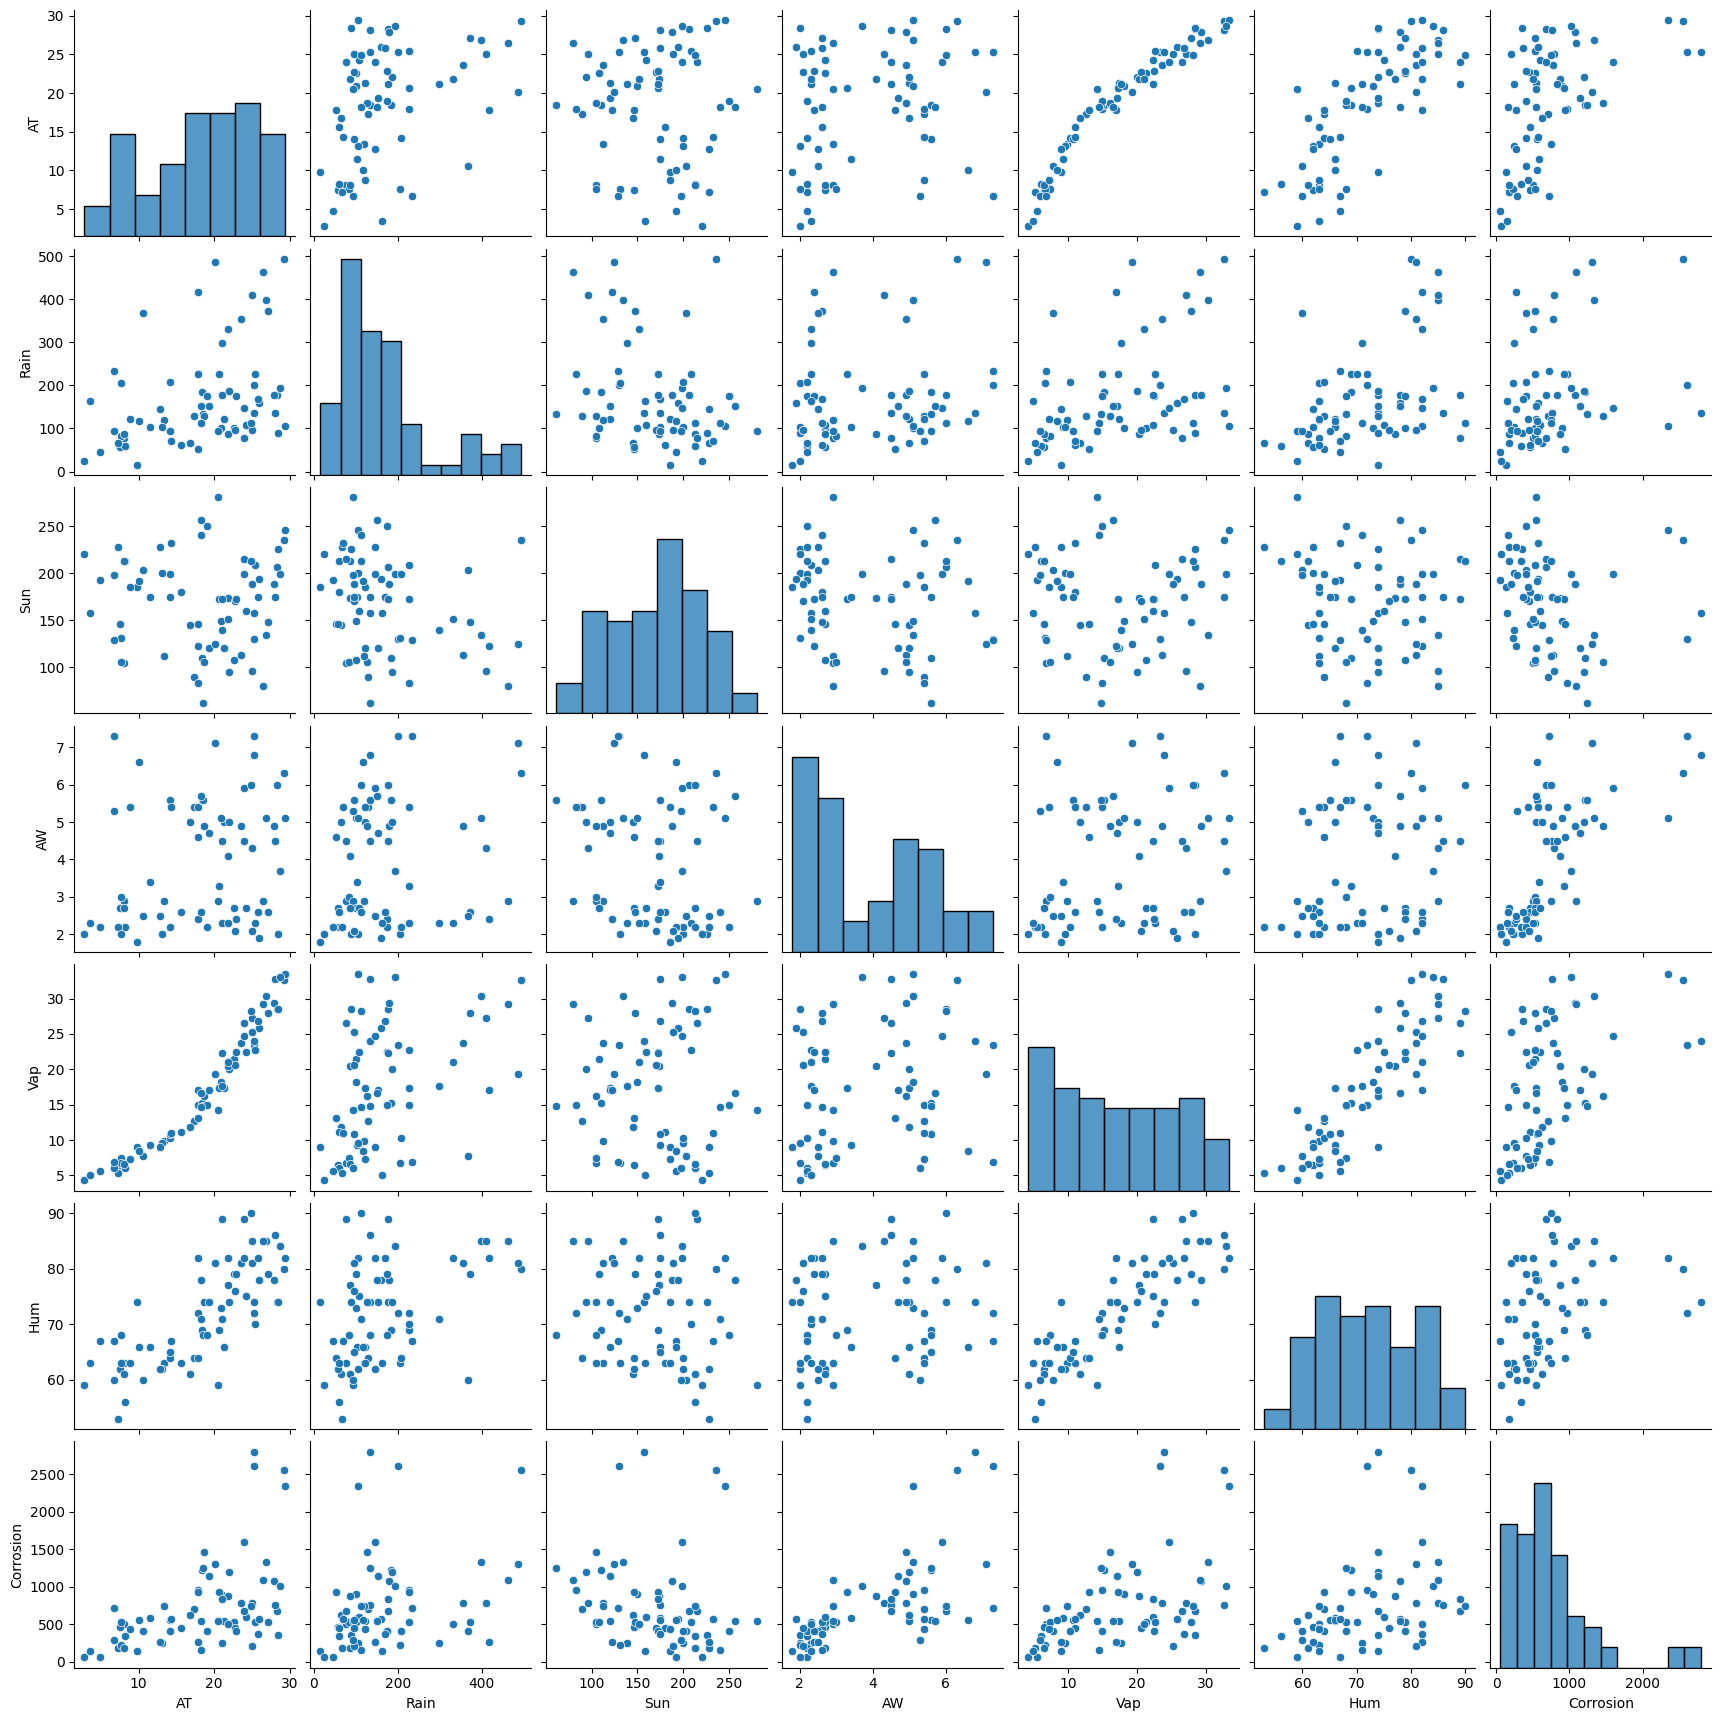

In [7]:
#　ペアプロットによる各変数間の二次元空間像（その２）
TARGET=['AT','Rain','Sun','AW','Vap','Hum','Corrosion']
sns.pairplot(df[TARGET])
plt.show()

### ③ピアソン相関係数

ピアソンの相関係数は、2つの変数の間の線形関係の強さと方向を示す統計的指標です。値は-1から1の範囲を取り、以下のように解釈されます：

1：完全な正の相関（変数が同じ方向に変動）  
0：相関なし（変数間に線形関係がない）  
-1：完全な負の相関（変数が逆の方向に変動）  

相関係数の絶対値が大きいほど、2つの変数間の線形関係が強いことを示します。
pandasの`corr()`メソッドを使用すると数値データを持つ全ての列間の相関係数を計算し、相関行列として出力します。

In [8]:
#　相関係数
corr = df.corr()
corr

,AT,HAT,LAT,HT,LT,Rain,Mrain,Sun,Msnow,Snow,AW,MW,PMW,Vap,Hum,Lhum,Corrosion
AT,1.000000,0.992708,0.988412,0.933542,0.970636,0.381221,0.293055,-0.012393,-0.261869,-0.261411,0.227534,0.154631,0.124281,0.962473,0.765809,0.742856,0.513114
HAT,0.992708,1.000000,0.963873,0.896122,0.985858,0.384795,0.291415,-0.088417,-0.270644,-0.270154,0.302616,0.196578,0.147877,0.956568,0.768230,0.787954,0.563983
LAT,0.988412,0.963873,1.000000,0.961843,0.934699,0.361708,0.278912,0.073242,-0.246169,-0.245774,0.116437,0.087683,0.079251,0.953004,0.756036,0.673477,0.437072
HT,0.933542,0.896122,0.961843,1.000000,0.848740,0.406988,0.320879,0.089648,-0.172094,-0.171647,0.001760,0.030345,0.056243,0.896632,0.730786,0.559691,0.332105
LT,0.970636,0.985858,0.934699,0.848740,1.000000,0.337254,0.234049,-0.099407,-0.263686,-0.263251,0.318863,0.188195,0.123468,0.951370,0.770487,0.820029,0.578026
Rain,0.381221,0.384795,0.361708,0.406988,0.337254,1.000000,0.811960,-0.289397,-0.017290,-0.016999,0.156220,0.348485,0.388070,0.414962,0.435600,0.271455,0.290696
Mrain,0.293055,0.291415,0.278912,0.320879,0.234049,0.811960,1.000000,-0.108474,0.160589,0.160864,0.210707,0.421179,0.518364,0.297249,0.210510,0.165764,0.364023
Sun,-0.012393,-0.088417,0.073242,0.089648,-0.099407,-0.289397,-0.108474,1.000000,-0.015529,-0.015778,-0.202259,-0.013033,0.048703,0.008049,-0.119020,-0.224021,-0.187312
Msnow,-0.261869,-0.270644,-0.246169,-0.172094,-0.263686,-0.017290,0.160589,-0.015529,1.000000,0.999998,-0.129414,-0.088258,-0.005911,-0.187277,-0.131842,-0.149648,-0.133380
Snow,-0.261411,-0.270154,-0.245774,-0.171647,-0.263251,-0.016999,0.160864,-0.015778,0.999998,1.000000,-0.129159,-0.088096,-0.005788,-0.186947,-0.131527,-0.149337,-0.133126


### ④相関係数のヒートマッ
相関係数の数値だけでは、変数間の関係は直感的にわかりづらいものです。そこで、ヒートマップを用いて相関係数行列を可視化することで、変数間の関係性を視覚的に把握します。seabornライブラリの`heatmap()`関数は、DataFrame内の数値データの相関係数を色で表現したヒートマップを簡単に作成できます。またオプションとしてannot = Trueを指定することで、各セルに相関係数の数値を表示します。

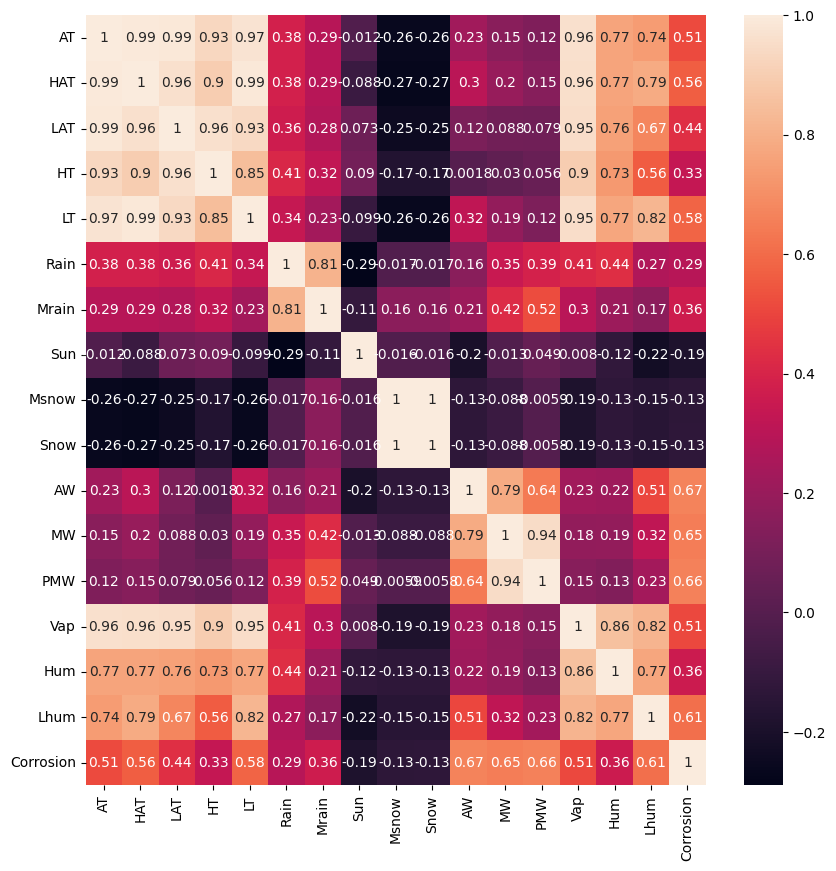

In [9]:
#相関係数をヒートマップ化する

plt.figure(figsize=(10,10))

sns.heatmap(corr, annot=True)
plt.show()

# 3.データの可視化
ペアプロットでは対象とするすべての相関グラフとヒストグラムを出力しました。ここでは、特に着目する特徴量のグラフについてmatpltlibを使って可視化する流れを学びます。

### 頻度分析（ヒストグラム）
大気腐食データセットにおける腐食量の分布を視覚化するヒストグラムを表示し、腐食量の頻度をみてみましょう。

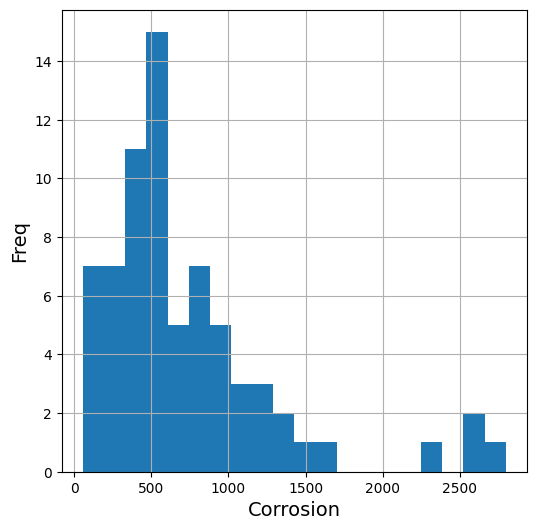

In [10]:
# 腐食量のヒストグラム
fig, ax = plt.subplots(figsize=(6,6))

#着目する変数の指定（ここでは腐食量）
X = df['Corrosion']

#ビン数は20分割
ax.hist(X, bins = 20)

#ラベル名
plt.xlabel('Corrosion', fontsize =14)
plt.ylabel('Freq', fontsize =14)

plt.grid()
plt.show()

### 相関図
大気腐食データセットを使って、腐食量 (Corrosion) と平均風速 (AW) との関係を示す散布図を作成してみましょう。

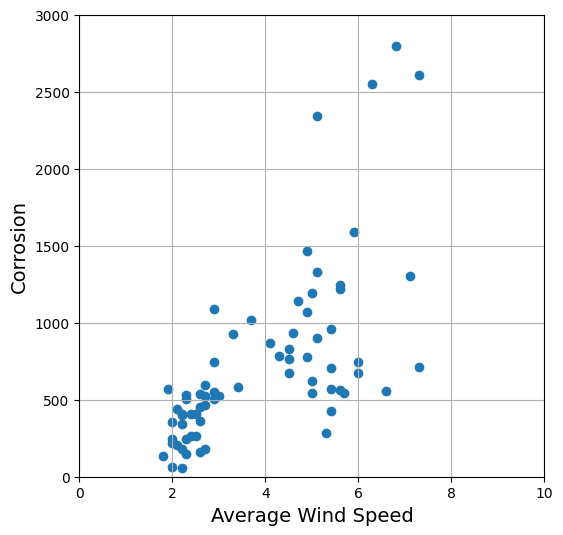

In [11]:
#腐食量と平均風速との相関図
fig, ax = plt.subplots(figsize=(6,6))

#着目する変数の指定（ここでは腐食量と平均風速）
X = df[['AW']]
y = df[['Corrosion']]

ax.scatter(X,y)

plt.xlabel("Average Wind Speed", fontsize =14)
plt.ylabel("Corrosion", fontsize =14)

# 横軸と縦軸のレンジの設定
plt.xlim(0, 10)
plt.ylim(0, 3000)

plt.grid()
plt.show()



### 単回帰モデル

線形回帰モデルは、複数の入力変数（特徴量）と一つの出力変数（目的変数）の関係を、直線または平面（多次元の場合）で表現するものです。このモデルは、入力変数の変化に対して出力変数が線形に変化するという前提に基づいています。中でも、最も基本的な形が「単回帰」です。単回帰モデルは、一つの入力変数と一つの出力変数の関係を直線で表します。

本節では、Pythonの機械学習ライブラリであるscikit-learnを使用して、単回帰分析を実施する方法について詳しく解説します。単回帰分析の手順を学ぶことで、他の機械学習モデルの構成や分析手法にも応用できる基礎知識を身につけることができます。

#### ① Scikit-learnライブラリのインポート
Scikit-learnライブラリのlinear_modelモジュールから線形回帰モデルのためのクラスである`LinearRegression`クラスをインポートします。

In [12]:
# 線形回帰モデル
from sklearn.linear_model import LinearRegression

#### ② 変数の指定
LinearRegressionモデルには2次元の配列（特徴量）を渡す必要があります。Xとyを次のようにして2次元のデータとしてリスト化します。

In [13]:
# 変数の定義
X = df[['AW']]
y = df[['Corrosion']]



#### ③ 単回帰モデルの作成

単回帰**機械学習モデルの設定（インスタンス化）**：  
単回帰をはじめとする機械学習モデルをScikit-learnで扱う際には、まず機械学習モデルのクラスをインスタンス化します。今回は、線形回帰モデルを使用するため、`LinearRegression()`クラスを用いてmodel（インスタンス変数）を作成します。

[2] **モデルの訓練（フィッティング）**：  
次に、作成したインスタンスに`fit()`メソッドを適用し、与えられたデータを基に入力変数と出力変数の関係を最もよく説明する線形関数の係数を計算し、モデルをフィットさせます。このプロセスは「訓練（Training）」と呼ばれます。
単回帰2行のコードで、機械学習モデルの設定と訓練が完了します。

In [14]:
#単回帰モデルの作成
model = LinearRegression()

#モデルの訓練（フィッティング）
model.fit(X, y)

LinearRegression()



###力変数の予測値の計算  
訓練済みの線形回帰モデルを使用して、入力データ`X`に基づいて予測値を計算するには、`predict()`メソッドを利用します。以下の例では、`model.predict(X)`によって入力データに対する予測された出力変数（目的変数）の値が計算され、その結果は`y_pred`という変数に格納されます。

In [15]:
y_pred = model.predict(X)



#### ⑤ 予測値の可視化  
次に、④で予測された値（予測値）を可視化し、実際の腐食量と予測された腐食量を比較するためにプロットします。これにより、モデルの予測精度を視覚的に確認することができます。

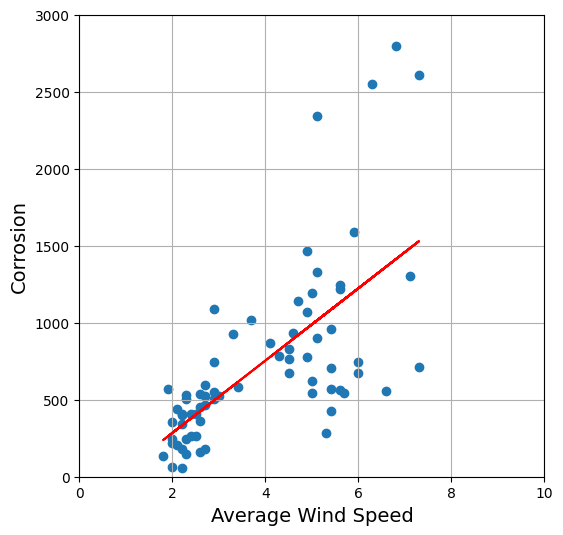

In [16]:
#腐食量と平均風速との関係図
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(X, y)
ax.plot(X, y_pred, linestyle="solid", color = "red")

plt.xlabel("Average Wind Speed", fontsize =14)
plt.ylabel("Corrosion", fontsize =14)

# 横軸のレンジを0から10に設定
plt.xlim(0, 10)
plt.ylim(0, 3000)

plt.grid()
plt.show()

#### ⑥　モデルの評価
モデルの性能を評価するために、いくつかの指標を用います。代表的な指標として、平均二乗誤差（MSE）、平均絶対誤差（MAE）、決定係数（R²スコア）などが挙げられます。

今回は、決定係数と相関係数に注目してモデルを評価します。決定係数は、モデルが実際のデータの変動をどれくらい説明できているかを示す指標です。一方、相関係数は、予測値と実際の値の間の線形な関係の強さを表します。

決定係数は、一般的に0から1の値をとり、1に近いほどモデルの当てはまりが良いことを示します。また、相関係数は-1から1の値をとり、1に近ければ強い正の相関、-1に近ければ強い負の相関、0に近ければ相関がないことを示します。

In [17]:
print('①　係数：', model.coef_[0])
print('②　切片：',model.intercept_)
print('③　決定係数 R^2： {:.3f}'.format(model.score(X, y)))

# 相関係数を決定係数から計算
r_squared = model.score(X, y)
correlation_coefficient = np.sqrt(r_squared)
print('④　相関係数： {:.3f}'.format(correlation_coefficient))

①　係数： [234.70842014]
②　切片： [-184.5103152]
③　決定係数 R^2： 0.442
④　相関係数： 0.665


【解説】  
① **係数**： `model.coef_` は線形回帰モデルの係数（回帰係数）を表します。この場合、`model.coef_[0]` は、最初の特徴量の係数を表示します。もし複数の特徴量がある場合は、`model.coef_` は配列で、各要素が対応する特徴量の係数になります。

② **切片**： `model.intercept_` は線形回帰モデルの切片（回帰直線がY軸と交わる点の値）を表示します。これは、すべての特徴量がゼロの場合の予測値です。

③ **決定係数**： `model.score(X, y)` はモデルの決定係数 \( R^2 \) を計算します。決定係数 \( R^2 \) は、モデルがどれだけデータの分散を説明できるかを示す指標で、1に近いほどモデルの説明力が高いことを意味します。決定係数の定義式は以下の通りです：

$$
R^2 = 1 - \frac{\text{RSS}}{\text{TSS}}
$$

ここで、RSS（残差平方和）はモデルの予測と実際の値の差の平方和、TSS（全平方和）は実際の値とその平均値との差の平方和です。`{:.3f}` は、出力を小数点以下3桁にフォーマットして表示するための指定です。

④ **相関係数**： 相関係数は決定係数の平方根です。相関係数の定義式は以下の通りです：

$$
r = \sqrt{R^2}
$$

ここで、\( r \) は相関係数であり、\( R^2 \) は決定係数です。相関係数は、実際の値と予測値との線形関係の強さを示します。相関係数の計算は、`np.sqrt(_squared)` で行います。
形関係の強さを示します。相関係数の計算は、`np.sqrt
r_squared)` で行います。